In [1]:
import requests
import pandas as pd
import sys
import os
import numpy as np
import matplotlib.pyplot as plt
# import torch
import tensorflow as tf
from skimage import io, transform
import matplotlib.pyplot as plt
import time

ModuleNotFoundError: No module named 'skimage'

In [2]:
print(os.getcwd())
print(os.listdir())

C:\Users\Jason\Documents\SJSU\JPAstro
['.git', '.gitignore', '.ipynb_checkpoints', 'adv-gal-exercise1.xls', 'Astro Introbook.ipynb', 'DGSATI-HST.ipynb', 'flake.lock', 'flake.nix', 'IntroImages', 'path', 'PCC_cat.txt', 'Perseus Cluster.ipynb', 'Perseus Cluster.ipynb.old', 'results.csv', 'SDSS0', 'SDSS1', 'Skyserver_Radial9_28_2022 7_00_56 AM.csv', 'specutils_demo.ipynb', 'test', 'waittest', 'Wittmann_etal19.pdf']


In [3]:
# testUrl = f'https://skyserver.sdss.org/dr16/SkyServerWS/ImgCutout/getjpeg?TaskName=Skyserver.Explore.Image&ra={raEx}&dec={dcEx}&scale=0.1&width=200&height=200' 
# testUrl
stringCont = 'Here is a particularly long string'\
' and here is the rest'

stringCont

'Here is a particularly long string and here is the rest'

In [4]:
df0 = pd.read_fwf('PCC_cat.txt', header=None)
df0

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
0,NaN,PCC-0001,49.2355,41.5722,20.51,0.04,1.44,0.10,20.80,1.07,...,0.69,0.25,0.63,0.28,NaN,NaN,Likely cluster or background edge-on disk galaxy,NaN,NaN,http://dc.zah.uni-heidelberg.de/pcc/q/stamp/dl...
1,NaN,PCC-0002,49.2366,41.4013,20.44,0.04,2.18,0.14,21.96,0.79,...,1.53,1.01,1.38,0.97,NaN,NaN,Likely cluster or background edge-on disk galaxy,NaN,NaN,http://dc.zah.uni-heidelberg.de/pcc/q/stamp/dl...
2,NaN,PCC-0003,49.2370,41.4336,21.58,0.04,1.11,0.07,22.41,0.07,...,1.25,0.71,1.19,0.67,NaN,NaN,Likely cluster or background edge-on disk galaxy,NaN,NaN,http://dc.zah.uni-heidelberg.de/pcc/q/stamp/dl...
3,NaN,PCC-0004,49.2377,41.5285,21.03,0.06,1.08,0.10,23.14,0.69,...,0.58,0.25,0.42,0.15,NaN,NaN,Likely background ETG or unresolved source,NaN,NaN,http://dc.zah.uni-heidelberg.de/pcc/q/stamp/dl...
4,NaN,PCC-0005,49.2380,41.4346,20.27,0.02,1.24,0.04,21.94,0.80,...,0.70,0.50,0.53,0.48,NaN,NaN,Likely cluster or background edge-on disk galaxy,NaN,NaN,http://dc.zah.uni-heidelberg.de/pcc/q/stamp/dl...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5432,NaN,PCC-5433,50.0062,41.2380,20.32,NaN,1.10,NaN,22.53,3.80,...,0.97,0.83,0.93,0.69,NaN,NaN,Likely background ETG or unresolved source,NaN,NaN,http://dc.zah.uni-heidelberg.de/pcc/q/stamp/dl...
5433,NaN,PCC-5434,50.0064,41.2568,22.63,NaN,0.54,NaN,23.29,0.50,...,1.46,1.12,NaN,NaN,NaN,NaN,Likely cluster or background edge-on disk galaxy,NaN,NaN,http://dc.zah.uni-heidelberg.de/pcc/q/stamp/dl...
5434,NaN,PCC-5435,50.0068,41.6048,21.44,0.02,0.61,0.02,21.52,0.43,...,0.59,0.41,NaN,NaN,NaN,NaN,Likely cluster or background edge-on disk galaxy,NaN,NaN,http://dc.zah.uni-heidelberg.de/pcc/q/stamp/dl...
5435,NaN,PCC-5436,50.0070,41.3916,21.32,0.07,0.99,0.10,22.86,0.95,...,1.19,1.07,1.06,0.92,NaN,NaN,Cluster or background LTG,NaN,NaN,http://dc.zah.uni-heidelberg.de/pcc/q/stamp/dl...


In [ ]:
ra = df0[2]
dec = df0[3]

# think about pausing every 100 images or so

for i in range(len(ra)):
# for i in range(800):
    urlVar = f'https://skyserver.sdss.org/dr16/SkyServerWS/ImgCutout/'\
    f'getjpeg?TaskName=Skyserver.Explore.Image&ra={str(ra[i]).strip()}'\
    f'&dec={str(dec[i]).strip()}&scale=0.1&width=200&height=200'
    
    # tell the loop to pause for a bit - every 100 images
    if i%100==0:
        time.sleep(5)
        
    img_data = requests.get(urlVar).content
    with open(f'SDSS1/sdss_ra={ra[i]}_dec={dec[i]}.png', 'wb') as handler:
        handler.write(img_data)

In [7]:

ra = df0[2]
dec = df0[3]
images = [f'https://skyserver.sdss.org/dr16/SkyServerWS/ImgCutout/'\
          f'getjpeg?TaskName=Skyserver.Explore.Image&ra={str(ra[i]).strip()}'\
          f'&dec={str(dec[i]).strip()}&scale=0.1&width=200&height=200' for i in range(len(ra))]


print(len(images))

print(images[0])
print(images[-1])

5437
https://skyserver.sdss.org/dr16/SkyServerWS/ImgCutout/getjpeg?TaskName=Skyserver.Explore.Image&ra=49.2355&dec=41.5722&scale=0.1&width=200&height=200
https://skyserver.sdss.org/dr16/SkyServerWS/ImgCutout/getjpeg?TaskName=Skyserver.Explore.Image&ra=50.0089&dec=41.6781&scale=0.1&width=200&height=200


In [9]:
# os.path.join('SDSS', f'sdss_ra={str(df0[2][1])}_dec={str(df0[3][1])}.jpeg')

class PerseusDataset(torch.utils.data.Dataset):
    def __init__(self, fwf_file, img_dir):
        
        self.catalogue_frame = pd.read_fwf(fwf_file, header=None)
        self.img_dir = img_dir        

    def __len__(self):
        return len(self.catalogue_frame)
    
    def __getitem__(self, idx):
        if torch.is_tensor(idx):
            idx = idx.tolist()
            
        img_name = os.path.join(self.img_dir,
                                f'sdss_ra={str(self.catalogue_frame[2][idx]).strip()}'\
                                f'_dec={str(self.catalogue_frame[3][idx]).strip()}.jpeg')
        
        image = io.imread(img_name)
        return(image)

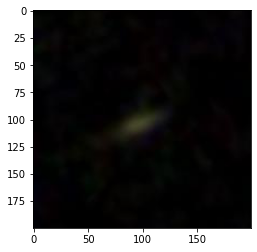

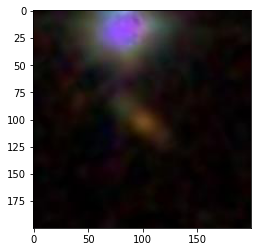

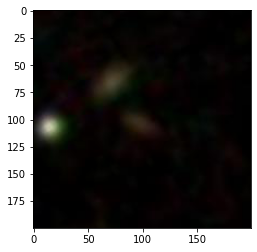

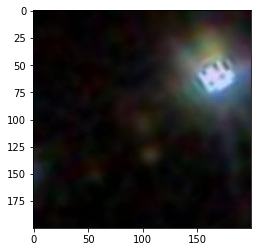

In [10]:
dataset0 = PerseusDataset(fwf_file = 'PCC_cat.txt',
                          img_dir = 'SDSS1')

for i in range(4):
    plt.figure()
    plt.imshow(dataset0[i])

In [16]:
loader = torch.utils.data.DataLoader(dataset0, batch_size = 10)

In [40]:
# convention in pytorch that channels come before dimension of image 
# [batch, channels, dims]

for i,batch in enumerate(loader):
    print(i)
    print(batch.shape)
#         print(torch.moveaxis(batch, 3, 1).shape) # moveaxis(tensor, source, destination)
    batch = batch.moveaxis(3, 1) # moveaxis(tensor, source, destination)
    print(batch.shape)
        

0
torch.Size([10, 200, 200, 3])
torch.Size([10, 3, 200, 200])
1
torch.Size([10, 200, 200, 3])
torch.Size([10, 3, 200, 200])
2
torch.Size([10, 200, 200, 3])
torch.Size([10, 3, 200, 200])
3
torch.Size([10, 200, 200, 3])
torch.Size([10, 3, 200, 200])
4
torch.Size([10, 200, 200, 3])
torch.Size([10, 3, 200, 200])
5
torch.Size([10, 200, 200, 3])
torch.Size([10, 3, 200, 200])
6
torch.Size([10, 200, 200, 3])
torch.Size([10, 3, 200, 200])
7
torch.Size([10, 200, 200, 3])
torch.Size([10, 3, 200, 200])
8
torch.Size([10, 200, 200, 3])
torch.Size([10, 3, 200, 200])
9
torch.Size([10, 200, 200, 3])
torch.Size([10, 3, 200, 200])
10
torch.Size([10, 200, 200, 3])
torch.Size([10, 3, 200, 200])
11
torch.Size([10, 200, 200, 3])
torch.Size([10, 3, 200, 200])
12
torch.Size([10, 200, 200, 3])
torch.Size([10, 3, 200, 200])
13
torch.Size([10, 200, 200, 3])
torch.Size([10, 3, 200, 200])
14
torch.Size([10, 200, 200, 3])
torch.Size([10, 3, 200, 200])
15
torch.Size([10, 200, 200, 3])
torch.Size([10, 3, 200, 200])
16

torch.Size([10, 3, 200, 200])
146
torch.Size([10, 200, 200, 3])
torch.Size([10, 3, 200, 200])
147
torch.Size([10, 200, 200, 3])
torch.Size([10, 3, 200, 200])
148
torch.Size([10, 200, 200, 3])
torch.Size([10, 3, 200, 200])
149
torch.Size([10, 200, 200, 3])
torch.Size([10, 3, 200, 200])
150
torch.Size([10, 200, 200, 3])
torch.Size([10, 3, 200, 200])
151
torch.Size([10, 200, 200, 3])
torch.Size([10, 3, 200, 200])
152
torch.Size([10, 200, 200, 3])
torch.Size([10, 3, 200, 200])
153
torch.Size([10, 200, 200, 3])
torch.Size([10, 3, 200, 200])
154
torch.Size([10, 200, 200, 3])
torch.Size([10, 3, 200, 200])
155
torch.Size([10, 200, 200, 3])
torch.Size([10, 3, 200, 200])
156
torch.Size([10, 200, 200, 3])
torch.Size([10, 3, 200, 200])
157
torch.Size([10, 200, 200, 3])
torch.Size([10, 3, 200, 200])
158
torch.Size([10, 200, 200, 3])
torch.Size([10, 3, 200, 200])
159
torch.Size([10, 200, 200, 3])
torch.Size([10, 3, 200, 200])
160
torch.Size([10, 200, 200, 3])
torch.Size([10, 3, 200, 200])
161
torch.

torch.Size([10, 3, 200, 200])
303
torch.Size([10, 200, 200, 3])
torch.Size([10, 3, 200, 200])
304
torch.Size([10, 200, 200, 3])
torch.Size([10, 3, 200, 200])
305
torch.Size([10, 200, 200, 3])
torch.Size([10, 3, 200, 200])
306
torch.Size([10, 200, 200, 3])
torch.Size([10, 3, 200, 200])
307
torch.Size([10, 200, 200, 3])
torch.Size([10, 3, 200, 200])
308
torch.Size([10, 200, 200, 3])
torch.Size([10, 3, 200, 200])
309
torch.Size([10, 200, 200, 3])
torch.Size([10, 3, 200, 200])
310
torch.Size([10, 200, 200, 3])
torch.Size([10, 3, 200, 200])
311
torch.Size([10, 200, 200, 3])
torch.Size([10, 3, 200, 200])
312
torch.Size([10, 200, 200, 3])
torch.Size([10, 3, 200, 200])
313
torch.Size([10, 200, 200, 3])
torch.Size([10, 3, 200, 200])
314
torch.Size([10, 200, 200, 3])
torch.Size([10, 3, 200, 200])
315
torch.Size([10, 200, 200, 3])
torch.Size([10, 3, 200, 200])
316
torch.Size([10, 200, 200, 3])
torch.Size([10, 3, 200, 200])
317
torch.Size([10, 200, 200, 3])
torch.Size([10, 3, 200, 200])
318
torch.

torch.Size([10, 3, 200, 200])
459
torch.Size([10, 200, 200, 3])
torch.Size([10, 3, 200, 200])
460
torch.Size([10, 200, 200, 3])
torch.Size([10, 3, 200, 200])
461
torch.Size([10, 200, 200, 3])
torch.Size([10, 3, 200, 200])
462
torch.Size([10, 200, 200, 3])
torch.Size([10, 3, 200, 200])
463
torch.Size([10, 200, 200, 3])
torch.Size([10, 3, 200, 200])
464
torch.Size([10, 200, 200, 3])
torch.Size([10, 3, 200, 200])
465
torch.Size([10, 200, 200, 3])
torch.Size([10, 3, 200, 200])
466
torch.Size([10, 200, 200, 3])
torch.Size([10, 3, 200, 200])
467
torch.Size([10, 200, 200, 3])
torch.Size([10, 3, 200, 200])
468
torch.Size([10, 200, 200, 3])
torch.Size([10, 3, 200, 200])
469
torch.Size([10, 200, 200, 3])
torch.Size([10, 3, 200, 200])
470
torch.Size([10, 200, 200, 3])
torch.Size([10, 3, 200, 200])
471
torch.Size([10, 200, 200, 3])
torch.Size([10, 3, 200, 200])
472
torch.Size([10, 200, 200, 3])
torch.Size([10, 3, 200, 200])
473
torch.Size([10, 200, 200, 3])
torch.Size([10, 3, 200, 200])
474
torch.

In [45]:
import torch.nn as nn
import torch.nn.functional as F

# class Model(nn.Module):
#     def __init__(self):
#         super().__init__()
#         self.conv1 = nn.Conv2d(1, 20, 5)
#         self.conv2 = nn.Conv2d(20, 20, 5)

#     def forward(self, x):
#         x = F.relu(self.conv1(x))
#         return F.relu(self.conv2(x))

# myConv = nn.Conv2d(3, 10, 5)
# fullyConnect = nn.Linear(3, 10, 5)
# flatBatch = nn.Flatten()
# fullyConnect(batch)

TypeError: linear(): argument 'input' (position 1) must be Tensor, not Flatten

In [14]:
import torch.nn as nn
import torch.nn.functional as F

x = torch.randn(10, 3, 200, 200)
myConv = nn.Conv2d(3, 10, 5)
myConv(x).shape
myConv.bias 
myConv.weight

Parameter containing:
tensor([[[[ 1.0910e-01, -2.0625e-03, -1.0522e-01, -7.6155e-02,  8.1580e-02],
          [ 5.0298e-02,  7.5288e-02,  4.5130e-02, -7.3011e-02,  6.9893e-02],
          [ 3.2042e-02, -5.7374e-02,  9.5740e-02,  2.1367e-03,  1.1397e-01],
          [ 1.0485e-01,  9.8115e-02, -6.3455e-02,  1.7866e-02,  9.1849e-03],
          [ 1.0523e-01, -1.9887e-02, -8.7807e-02,  5.0129e-02,  1.0726e-01]],

         [[-9.1513e-02, -3.1393e-02, -1.7882e-02, -1.4380e-02,  1.1069e-01],
          [-4.6233e-02, -1.1209e-01, -1.7859e-02, -4.3114e-02, -4.9700e-03],
          [-9.4613e-04, -3.9416e-02,  9.7408e-02, -8.3383e-02,  1.1477e-01],
          [ 8.2330e-02,  9.0187e-02,  4.6667e-02,  9.6232e-02,  7.4156e-02],
          [ 9.2263e-03, -1.1196e-01,  4.5780e-02,  7.4854e-02, -7.3396e-02]],

         [[-1.0595e-01,  5.7451e-02, -1.0910e-01,  1.0289e-01, -4.0796e-02],
          [-9.9006e-02, -4.4553e-02,  1.7831e-02, -9.1663e-02,  1.1334e-01],
          [-4.5659e-02,  4.1225e-02,  2.9739e-02, 